<a href="https://colab.research.google.com/github/hudaor/leaf-disease-1/blob/main/AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyyaml h5py
from google.colab import drive
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/drive


In [ ]:
#Inceptionv3
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential

In [ ]:
#Parametres  
import keras
import tensorflow as tf
from tensorflow.keras.applications import VGG16
import sys
from tensorflow.keras import optimizers
from PIL import Image

#Using InceptionV3 Pre-trained Model
conv_base = InceptionV3(weights = 'imagenet',
              include_top = False,
              input_shape=(224, 224, 3))

conv_base.summary()

import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/content/drive/MyDrive/2022dataset 05 2 22'
train_dir = os.path.join(base_dir, 'train')
#validation_dir = os.path.join(base_dir, 'validation')
#test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

conv_base.trainable = False

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')

# Compile the model
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=2e-5),
metrics=['acc'])

# Train the model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=200,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=len(validation_generator))

# Save the model
model.save('/content/drive/MyDrive/2022dataset 05 2 22/acttanh.h5')

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_282 (Conv2D)            (None, 111, 111, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_282 (Batch  (None, 111, 111, 32  96         ['conv2d_282[0][0]']             
 Normalization)                 )                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:73: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/5
200/200 [==============================] - 670s 3s/step - loss: 0.5171 - acc: 0.7642 - val_loss: 0.3862 - val_acc: 0.8312
Epoch 2/5
200/200 [==============================] - 648s 3s/step - loss: 0.3335 - acc: 0.8606 - val_loss: 0.4337 - val_acc: 0.8231
Epoch 3/5
200/200 [==============================] - 680s 3s/step - loss: 0.2967 - acc: 0.8705 - val_loss: 0.2723 - val_acc: 0.8802
Epoch 4/5
200/200 [==============================] - 705s 4s/step - loss: 0.2776 - acc: 0.8849 - val_loss: 0.2343 - val_acc: 0.9051
Epoch 5/5
200/200 [==============================] - 707s 4s/step - loss: 0.2536 - acc: 0.8928 - val_loss: 0.2210 - val_acc: 0.9108


In [ ]:
np.save('/content/drive/MyDrive/history AF/history', history)

INFO:tensorflow:Assets written to: ram://be2e0380-b5bd-431a-9b6e-d5e3bac9e117/assets


In [ ]:
from keras.metrics import CategoricalHinge
################--TESTED--#########################
#REFER: https://gist.github.com/RyanAkilos/3808c17f79e77c4117de35aa68447045
#Confution Matrix and Classification Report
#problem with column filled with zeros refer to : https://stackoverflow.com/questions/51282098/plotting-confusion-matrix-for-an-image-classification-model?rq=1
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
from keras.models import load_model
#import numpy as nb_epochs
import numpy as np

classifier = load_model('/content/drive/MyDrive/2022dataset 05 2 22/acttanh.h5')
test_datagen = ImageDataGenerator(rescale=1./255)
# only rescaling
train_datagen =  ImageDataGenerator(rescale=1./255)
test_datagen =  ImageDataGenerator(rescale=1./255)

train_data_dir = "/content/drive/MyDrive/2022dataset 05 2 22/train"
val_data_dir = "/content/drive/MyDrive/2022dataset 05 2 22/validation"
#test_data_dir = "/content/drive/MyDrive/2022dataset 05 2 22/test"


val_set = test_datagen.flow_from_directory(val_data_dir,
                                                  target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'binary',
                                                 shuffle=False)

batch_size=16
val_set.reset()
Y_pred = classifier.predict(val_set, len(val_set) // batch_size+1, workers=0)
y_pred = np.where(Y_pred>0.5, 1, 0)

#y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(val_set.classes, y_pred)

#y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(cm)
print('Classification Report')
target_names = ['Diseased', 'Healthy']
print(classification_report(val_set.classes, y_pred, target_names=target_names,digits=4))

Found 8726 images belonging to 2 classes.
Confusion Matrix
[[3966  468]
 [ 310 3982]]
Classification Report
              precision    recall  f1-score   support

    Diseased     0.9275    0.8945    0.9107      4434
     Healthy     0.8948    0.9278    0.9110      4292

    accuracy                         0.9108      8726
   macro avg     0.9112    0.9111    0.9108      8726
weighted avg     0.9114    0.9108    0.9108      8726



In [ ]:
#Parametres  
import keras
import tensorflow as tf
from tensorflow.keras.applications import VGG16
import sys
from tensorflow.keras import optimizers
from PIL import Image

#Using InceptionV3 Pre-trained Model
conv_base = InceptionV3(weights = 'imagenet',
              include_top = False,
              input_shape=(224, 224, 3))

conv_base.summary()

import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/content/drive/MyDrive/2022dataset 05 2 22'
train_dir = os.path.join(base_dir, 'train')
#validation_dir = os.path.join(base_dir, 'validation')
#test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='softmax'))
model.add(layers.Dense(1, activation='sigmoid'))

conv_base.trainable = False

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')

# Compile the model
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=2e-5),
metrics=['acc'])

# Train the model
history2 = model.fit_generator(
    train_generator,
    steps_per_epoch=200,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=len(validation_generator))

# Save the model
model.save('/content/drive/MyDrive/2022dataset 05 2 22/actsoftmax.h5')

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_30 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_2711 (Conv2D)           (None, 111, 111, 32  864         ['input_30[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_2711 (Batc  (None, 111, 111, 32  96         ['conv2d_2711[0][0]']            
 hNormalization)                )                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:73: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/5
200/200 [==============================] - 870s 4s/step - loss: 0.6664 - acc: 0.7527 - val_loss: 0.6548 - val_acc: 0.8240
Epoch 2/5
200/200 [==============================] - 868s 4s/step - loss: 0.6497 - acc: 0.8443 - val_loss: 0.6457 - val_acc: 0.8608
Epoch 3/5
200/200 [==============================] - 861s 4s/step - loss: 0.6432 - acc: 0.8687 - val_loss: 0.6415 - val_acc: 0.8725
Epoch 4/5
200/200 [==============================] - 834s 4s/step - loss: 0.6394 - acc: 0.8788 - val_loss: 0.6386 - val_acc: 0.8793
Epoch 5/5
200/200 [==============================] - 871s 4s/step - loss: 0.6384 - acc: 0.8727 - val_loss: 0.6360 - val_acc: 0.8857


In [ ]:
np.save('/content/drive/MyDrive/history AF/history2', history2)
from keras.metrics import CategoricalHinge
################--TESTED--#########################
#REFER: https://gist.github.com/RyanAkilos/3808c17f79e77c4117de35aa68447045
#Confution Matrix and Classification Report
#problem with column filled with zeros refer to : https://stackoverflow.com/questions/51282098/plotting-confusion-matrix-for-an-image-classification-model?rq=1
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
from keras.models import load_model
#import numpy as nb_epochs
import numpy as np

classifier = load_model('/content/drive/MyDrive/2022dataset 05 2 22/actsoftmax.h5')
test_datagen = ImageDataGenerator(rescale=1./255)
# only rescaling
train_datagen =  ImageDataGenerator(rescale=1./255)
test_datagen =  ImageDataGenerator(rescale=1./255)

train_data_dir = "/content/drive/MyDrive/2022dataset 05 2 22/train"
val_data_dir = "/content/drive/MyDrive/2022dataset 05 2 22/validation"
#test_data_dir = "/content/drive/MyDrive/2022dataset 05 2 22/test"


val_set = test_datagen.flow_from_directory(val_data_dir,
                                                  target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'binary',
                                                 shuffle=False)

batch_size=16
val_set.reset()
Y_pred = classifier.predict(val_set, len(val_set) // batch_size+1, workers=0)
y_pred = np.where(Y_pred>0.5, 1, 0)

#y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(val_set.classes, y_pred)

#y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(cm)
print('Classification Report')
target_names = ['Diseased', 'Healthy']
print(classification_report(val_set.classes, y_pred, target_names=target_names,digits=4))

INFO:tensorflow:Assets written to: ram://c61892b6-6101-4702-8ac1-aa98e8f76051/assets
Found 8726 images belonging to 2 classes.
Confusion Matrix
[[3548  886]
 [ 194 4098]]
Classification Report
              precision    recall  f1-score   support

    Diseased     0.9482    0.8002    0.8679      4434
     Healthy     0.8222    0.9548    0.8836      4292

    accuracy                         0.8762      8726
   macro avg     0.8852    0.8775    0.8757      8726
weighted avg     0.8862    0.8762    0.8756      8726



In [ ]:
#Parametres  
import keras
import tensorflow as tf
from tensorflow.keras.applications import VGG16
import sys
from tensorflow.keras import optimizers
from PIL import Image

#Using InceptionV3 Pre-trained Model
conv_base = InceptionV3(weights = 'imagenet',
              include_top = False,
              input_shape=(224, 224, 3))

conv_base.summary()

import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/content/drive/MyDrive/2022dataset 05 2 22'
train_dir = os.path.join(base_dir, 'train')
#validation_dir = os.path.join(base_dir, 'validation')
#test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='sigmoid'))
model.add(layers.Dense(1, activation='sigmoid'))

conv_base.trainable = False

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')

# Compile the model
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=2e-5),
metrics=['acc'])

# Train the model
history1 = model.fit_generator(
    train_generator,
    steps_per_epoch=200,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=len(validation_generator))

# Save the model
model.save('/content/drive/MyDrive/2022dataset 05 2 22/actsigmoid.h5')

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:73: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/5
200/200 [==============================] - 1285s 6s/step - loss: 0.4503 - acc: 0.7870 - val_loss: 0.3258 - val_acc: 0.8692
Epoch 2/5
200/200 [==============================] - 901s 5s/step - loss: 0.3238 - acc: 0.8643 - val_loss: 0.4396 - val_acc: 0.7788
Epoch 3/5
200/200 [==============================] - 894s 4s/step - loss: 0.2724 - acc: 0.8887 - val_loss: 0.2522 - val_acc: 0.8980
Epoch 4/5
200/200 [==============================] - 836s 4s/step - loss: 0.2703 - acc: 0.8878 - val_loss: 0.2428 - val_acc: 0.9049
Epoch 5/5
200/200 [==============================] - 838s 4s/step - loss: 0.2582 - acc: 0.8890 - val_loss: 0.2250 - val_acc: 0.9081


In [ ]:
np.save('/content/drive/MyDrive/history AF/history1', history1)
from keras.metrics import CategoricalHinge
################--TESTED--#########################
#REFER: https://gist.github.com/RyanAkilos/3808c17f79e77c4117de35aa68447045
#Confution Matrix and Classification Report
#problem with column filled with zeros refer to : https://stackoverflow.com/questions/51282098/plotting-confusion-matrix-for-an-image-classification-model?rq=1
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
from keras.models import load_model
#import numpy as nb_epochs
import numpy as np

classifier = load_model('/content/drive/MyDrive/2022dataset 05 2 22/actsigmoid.h5')
test_datagen = ImageDataGenerator(rescale=1./255)
# only rescaling
train_datagen =  ImageDataGenerator(rescale=1./255)
test_datagen =  ImageDataGenerator(rescale=1./255)

train_data_dir = "/content/drive/MyDrive/2022dataset 05 2 22/train"
val_data_dir = "/content/drive/MyDrive/2022dataset 05 2 22/validation"
#test_data_dir = "/content/drive/MyDrive/2022dataset 05 2 22/test"


val_set = test_datagen.flow_from_directory(val_data_dir,
                                                  target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'binary',
                                                 shuffle=False)

batch_size=16
val_set.reset()
Y_pred = classifier.predict(val_set, len(val_set) // batch_size+1, workers=0)
y_pred = np.where(Y_pred>0.5, 1, 0)

#y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(val_set.classes, y_pred)

#y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(cm)
print('Classification Report')
target_names = ['Diseased', 'Healthy']
print(classification_report(val_set.classes, y_pred, target_names=target_names,digits=4))

INFO:tensorflow:Assets written to: ram://744b1a04-e361-4f03-90b2-6373cbc2b30c/assets
Found 8726 images belonging to 2 classes.
Confusion Matrix
[[3897  537]
 [ 265 4027]]
Classification Report
              precision    recall  f1-score   support

    Diseased     0.9363    0.8789    0.9067      4434
     Healthy     0.8823    0.9383    0.9094      4292

    accuracy                         0.9081      8726
   macro avg     0.9093    0.9086    0.9081      8726
weighted avg     0.9098    0.9081    0.9080      8726



In [ ]:
#Parametres  
import keras
import tensorflow as tf
from tensorflow.keras.applications import VGG16
import sys
from tensorflow.keras import optimizers
from PIL import Image

#Using InceptionV3 Pre-trained Model
conv_base = InceptionV3(weights = 'imagenet',
              include_top = False,
              input_shape=(224, 224, 3))

conv_base.summary()

import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/content/drive/MyDrive/2022dataset 05 2 22'
train_dir = os.path.join(base_dir, 'train')
#validation_dir = os.path.join(base_dir, 'validation')
#test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='softplus'))
model.add(layers.Dense(1, activation='sigmoid'))

conv_base.trainable = False

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')

# Compile the model
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=2e-5),
metrics=['acc'])

# Train the model
history7 = model.fit_generator(
    train_generator,
    steps_per_epoch=200,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=len(validation_generator))

# Save the model
model.save('/content/drive/MyDrive/2022dataset 05 2 22/actSoftplus.h5')

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_31 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_2805 (Conv2D)           (None, 111, 111, 32  864         ['input_31[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_2805 (Batc  (None, 111, 111, 32  96         ['conv2d_2805[0][0]']            
 hNormalization)                )                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:73: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/5
200/200 [==============================] - 997s 5s/step - loss: 0.5233 - acc: 0.7632 - val_loss: 0.3459 - val_acc: 0.8525
Epoch 2/5
200/200 [==============================] - 917s 5s/step - loss: 0.3357 - acc: 0.8612 - val_loss: 0.2508 - val_acc: 0.9010
Epoch 3/5
200/200 [==============================] - 922s 5s/step - loss: 0.3150 - acc: 0.8712 - val_loss: 0.2388 - val_acc: 0.9057
Epoch 4/5
200/200 [==============================] - 799s 4s/step - loss: 0.2814 - acc: 0.8855 - val_loss: 0.2263 - val_acc: 0.9102
Epoch 5/5
200/200 [==============================] - 804s 4s/step - loss: 0.2600 - acc: 0.8980 - val_loss: 0.2252 - val_acc: 0.9090


In [ ]:
np.save('/content/drive/MyDrive/history AF/history7', history7)
from keras.metrics import CategoricalHinge
################--TESTED--#########################
#REFER: https://gist.github.com/RyanAkilos/3808c17f79e77c4117de35aa68447045
#Confution Matrix and Classification Report
#problem with column filled with zeros refer to : https://stackoverflow.com/questions/51282098/plotting-confusion-matrix-for-an-image-classification-model?rq=1
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
from keras.models import load_model
#import numpy as nb_epochs
import numpy as np

classifier = load_model('/content/drive/MyDrive/2022dataset 05 2 22/actSoftplus.h5')
test_datagen = ImageDataGenerator(rescale=1./255)
# only rescaling
train_datagen =  ImageDataGenerator(rescale=1./255)
test_datagen =  ImageDataGenerator(rescale=1./255)

train_data_dir = "/content/drive/MyDrive/2022dataset 05 2 22/train"
val_data_dir = "/content/drive/MyDrive/2022dataset 05 2 22/validation"
#test_data_dir = "/content/drive/MyDrive/2022dataset 05 2 22/test"


val_set = test_datagen.flow_from_directory(val_data_dir,
                                                  target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'binary',
                                                 shuffle=False)

batch_size=16
val_set.reset()
Y_pred = classifier.predict(val_set, len(val_set) // batch_size+1, workers=0)
y_pred = np.where(Y_pred>0.5, 1, 0)

#y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(val_set.classes, y_pred)

#y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(cm)
print('Classification Report')
target_names = ['Diseased', 'Healthy']
print(classification_report(val_set.classes, y_pred, target_names=target_names,digits=4))

INFO:tensorflow:Assets written to: ram://bcd3df53-aa37-4c9e-b4df-06df1e85f983/assets


INFO:tensorflow:Assets written to: ram://bcd3df53-aa37-4c9e-b4df-06df1e85f983/assets


Found 8726 images belonging to 2 classes.
Confusion Matrix
[[3773  661]
 [ 133 4159]]
Classification Report
              precision    recall  f1-score   support

    Diseased     0.9659    0.8509    0.9048      4434
     Healthy     0.8629    0.9690    0.9129      4292

    accuracy                         0.9090      8726
   macro avg     0.9144    0.9100    0.9088      8726
weighted avg     0.9152    0.9090    0.9088      8726



In [ ]:
#Parametres  
import keras
import tensorflow as tf
from tensorflow.keras.applications import VGG16
import sys
from tensorflow.keras import optimizers
from PIL import Image

#Using InceptionV3 Pre-trained Model
conv_base = InceptionV3(weights = 'imagenet',
              include_top = False,
              input_shape=(224, 224, 3))

conv_base.summary()

import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/content/drive/MyDrive/2022dataset 05 2 22'
train_dir = os.path.join(base_dir, 'train')
#validation_dir = os.path.join(base_dir, 'validation')
#test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='softsign'))
model.add(layers.Dense(1, activation='sigmoid'))

conv_base.trainable = False

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')

# Compile the model
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=2e-5),
metrics=['acc'])

# Train the model
history3 = model.fit_generator(
    train_generator,
    steps_per_epoch=200,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=len(validation_generator))

# Save the model
model.save('/content/drive/MyDrive/2022dataset 05 2 22/actSSoftsign.h5')

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1207 (Conv2D)           (None, 111, 111, 32  864         ['input_14[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_1207 (Batc  (None, 111, 111, 32  96         ['conv2d_1207[0][0]']            
 hNormalization)                )                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:73: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/5
200/200 [==============================] - 675s 3s/step - loss: 0.4758 - acc: 0.7903 - val_loss: 0.2925 - val_acc: 0.8796
Epoch 2/5
200/200 [==============================] - 661s 3s/step - loss: 0.3297 - acc: 0.8562 - val_loss: 0.2608 - val_acc: 0.8967
Epoch 3/5
200/200 [==============================] - 657s 3s/step - loss: 0.2845 - acc: 0.8774 - val_loss: 0.4604 - val_acc: 0.7821
Epoch 4/5
200/200 [==============================] - 677s 3s/step - loss: 0.2720 - acc: 0.8913 - val_loss: 0.2449 - val_acc: 0.8983
Epoch 5/5
200/200 [==============================] - 669s 3s/step - loss: 0.2530 - acc: 0.8950 - val_loss: 0.2198 - val_acc: 0.9129


In [ ]:
np.save('/content/drive/MyDrive/history AF/history3', history3)
from keras.metrics import CategoricalHinge
################--TESTED--#########################
#REFER: https://gist.github.com/RyanAkilos/3808c17f79e77c4117de35aa68447045
#Confution Matrix and Classification Report
#problem with column filled with zeros refer to : https://stackoverflow.com/questions/51282098/plotting-confusion-matrix-for-an-image-classification-model?rq=1
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
from keras.models import load_model
#import numpy as nb_epochs
import numpy as np

classifier = load_model('/content/drive/MyDrive/2022dataset 05 2 22/actSSoftsign.h5')
test_datagen = ImageDataGenerator(rescale=1./255)
# only rescaling
train_datagen =  ImageDataGenerator(rescale=1./255)
test_datagen =  ImageDataGenerator(rescale=1./255)

train_data_dir = "/content/drive/MyDrive/2022dataset 05 2 22/train"
val_data_dir = "/content/drive/MyDrive/2022dataset 05 2 22/validation"
#test_data_dir = "/content/drive/MyDrive/2022dataset 05 2 22/test"


val_set = test_datagen.flow_from_directory(val_data_dir,
                                                  target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'binary',
                                                 shuffle=False)

batch_size=16
val_set.reset()
Y_pred = classifier.predict(val_set, len(val_set) // batch_size+1, workers=0)
y_pred = np.where(Y_pred>0.5, 1, 0)

#y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(val_set.classes, y_pred)

#y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(cm)
print('Classification Report')
target_names = ['Diseased', 'Healthy']
print(classification_report(val_set.classes, y_pred, target_names=target_names,digits=4))

INFO:tensorflow:Assets written to: ram://1362549d-ec1e-4020-b30d-f368916694bd/assets
Found 8726 images belonging to 2 classes.
Confusion Matrix
[[4073  361]
 [ 399 3893]]
Classification Report
              precision    recall  f1-score   support

    Diseased     0.9108    0.9186    0.9147      4434
     Healthy     0.9151    0.9070    0.9111      4292

    accuracy                         0.9129      8726
   macro avg     0.9130    0.9128    0.9129      8726
weighted avg     0.9129    0.9129    0.9129      8726



In [ ]:
!pip install pyyaml h5py
from google.colab import drive
drive.mount('/content/drive')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Parametres  
import keras
import tensorflow as tf
from tensorflow.keras.applications import VGG16
import sys
from tensorflow.keras import optimizers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation,  LeakyReLU
from PIL import Image

#Using InceptionV3 Pre-trained Model
conv_base = InceptionV3(weights = 'imagenet',
              include_top = False,
              input_shape=(224, 224, 3))

conv_base.summary()

import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/content/drive/MyDrive/2022dataset 05 2 22'
train_dir = os.path.join(base_dir, 'train')
#validation_dir = os.path.join(base_dir, 'validation')
#test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

from keras import models
from keras import layers
def hard_sigmoid(x):
    return np.maximum(0, np.minimum(1, (x + 2) / 4))
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='LeakyReLU'))
model.add(layers.Dense(1, activation='sigmoid'))
conv_base.trainable = False

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')

# Compile the model
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=2e-5),
metrics=['acc'])

# Train the model
history4 = model.fit_generator(
    train_generator,
    steps_per_epoch=200,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=len(validation_generator))

# Save the model
model.save('/content/drive/MyDrive/2022dataset 05 2 22/hard sigmoidal.h5')
np.save('/content/drive/MyDrive/history AF/history4', history4)
from keras.metrics import CategoricalHinge
################--TESTED--#########################
#REFER: https://gist.github.com/RyanAkilos/3808c17f79e77c4117de35aa68447045
#Confution Matrix and Classification Report
#problem with column filled with zeros refer to : https://stackoverflow.com/questions/51282098/plotting-confusion-matrix-for-an-image-classification-model?rq=1
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
from keras.models import load_model
#import numpy as nb_epochs
import numpy as np

classifier = load_model('/content/drive/MyDrive/2022dataset 05 2 22/hard sigmoidal.h5')
test_datagen = ImageDataGenerator(rescale=1./255)
# only rescaling
train_datagen =  ImageDataGenerator(rescale=1./255)
test_datagen =  ImageDataGenerator(rescale=1./255)

train_data_dir = "/content/drive/MyDrive/2022dataset 05 2 22/train"
val_data_dir = "/content/drive/MyDrive/2022dataset 05 2 22/validation"
#test_data_dir = "/content/drive/MyDrive/2022dataset 05 2 22/test"


val_set = test_datagen.flow_from_directory(val_data_dir,
                                                  target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'binary',
                                                 shuffle=False)

batch_size=16
val_set.reset()
Y_pred = classifier.predict(val_set, len(val_set) // batch_size+1, workers=0)
y_pred = np.where(Y_pred>0.5, 1, 0)

#y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(val_set.classes, y_pred)

#y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(cm)
print('Classification Report')
target_names = ['Diseased', 'Healthy']
print(classification_report(val_set.classes, y_pred, target_names=target_names,digits=4))

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_27 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_2429 (Conv2D)           (None, 111, 111, 32  864         ['input_27[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_2429 (Batc  (None, 111, 111, 32  96         ['conv2d_2429[0][0]']            
 hNormalization)                )                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/5
200/200 [==============================] - 697s 3s/step - loss: 0.6701 - acc: 0.7333 - val_loss: 0.4202 - val_acc: 0.8244
Epoch 2/5
200/200 [==============================] - 644s 3s/step - loss: 0.4052 - acc: 0.8317 - val_loss: 0.2851 - val_acc: 0.8776
Epoch 3/5
200/200 [==============================] - 633s 3s/step - loss: 0.3354 - acc: 0.8621 - val_loss: 0.2460 - val_acc: 0.9005
Epoch 4/5
200/200 [==============================] - 639s 3s/step - loss: 0.3064 - acc: 0.8785 - val_loss: 0.2760 - val_acc: 0.8892
Epoch 5/5
200/200 [==============================] - 627s 3s/step - loss: 0.3197 - acc: 0.8706 - val_loss: 0.2210 - val_acc: 0.9097


INFO:tensorflow:Assets written to: ram://8b6d831f-e5f6-41e5-8fe9-fc9eaa6c59b0/assets


INFO:tensorflow:Assets written to: ram://8b6d831f-e5f6-41e5-8fe9-fc9eaa6c59b0/assets


Found 8726 images belonging to 2 classes.
Confusion Matrix
[[4093  341]
 [ 447 3845]]
Classification Report
              precision    recall  f1-score   support

    Diseased     0.9015    0.9231    0.9122      4434
     Healthy     0.9185    0.8959    0.9071      4292

    accuracy                         0.9097      8726
   macro avg     0.9100    0.9095    0.9096      8726
weighted avg     0.9099    0.9097    0.9097      8726



In [ ]:
#Parametres  
import keras
import tensorflow as tf
from tensorflow.keras.applications import VGG16
import sys
from tensorflow.keras import optimizers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation
from PIL import Image

#Using InceptionV3 Pre-trained Model
conv_base = InceptionV3(weights = 'imagenet',
              include_top = False,
              input_shape=(224, 224, 3))

conv_base.summary()

import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/content/drive/MyDrive/2022dataset 05 2 22'
train_dir = os.path.join(base_dir, 'train')
#validation_dir = os.path.join(base_dir, 'validation')
#test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

from keras import models
from keras import layers
def hard_sigmoid(x):
    return np.maximum(0, np.minimum(1, (x + 2) / 4))
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='swish'))
model.add(layers.Dense(1, activation='sigmoid'))
conv_base.trainable = False

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')

# Compile the model
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=2e-5),
metrics=['acc'])

# Train the model
history5 = model.fit_generator(
    train_generator,
    steps_per_epoch=200,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=len(validation_generator))

# Save the model
model.save('/content/drive/MyDrive/2022dataset 05 2 22/swish.h5')
np.save('/content/drive/MyDrive/history AF/history5', history5)
from keras.metrics import CategoricalHinge
################--TESTED--#########################
#REFER: https://gist.github.com/RyanAkilos/3808c17f79e77c4117de35aa68447045
#Confution Matrix and Classification Report
#problem with column filled with zeros refer to : https://stackoverflow.com/questions/51282098/plotting-confusion-matrix-for-an-image-classification-model?rq=1
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
from keras.models import load_model
#import numpy as nb_epochs
import numpy as np

classifier = load_model('/content/drive/MyDrive/2022dataset 05 2 22/swish.h5')
test_datagen = ImageDataGenerator(rescale=1./255)
# only rescaling
train_datagen =  ImageDataGenerator(rescale=1./255)
test_datagen =  ImageDataGenerator(rescale=1./255)

train_data_dir = "/content/drive/MyDrive/2022dataset 05 2 22/train"
val_data_dir = "/content/drive/MyDrive/2022dataset 05 2 22/validation"
#test_data_dir = "/content/drive/MyDrive/2022dataset 05 2 22/test"


val_set = test_datagen.flow_from_directory(val_data_dir,
                                                  target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'binary',
                                                 shuffle=False)

batch_size=16
val_set.reset()
Y_pred = classifier.predict(val_set, len(val_set) // batch_size+1, workers=0)
y_pred = np.where(Y_pred>0.5, 1, 0)

#y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(val_set.classes, y_pred)

#y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(cm)
print('Classification Report')
target_names = ['Diseased', 'Healthy']
print(classification_report(val_set.classes, y_pred, target_names=target_names,digits=4))

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_28 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_2523 (Conv2D)           (None, 111, 111, 32  864         ['input_28[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_2523 (Batc  (None, 111, 111, 32  96         ['conv2d_2523[0][0]']            
 hNormalization)                )                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/5
200/200 [==============================] - 654s 3s/step - loss: 0.5135 - acc: 0.7685 - val_loss: 0.3418 - val_acc: 0.8453
Epoch 2/5
200/200 [==============================] - 724s 4s/step - loss: 0.3442 - acc: 0.8485 - val_loss: 0.2632 - val_acc: 0.8919
Epoch 3/5
200/200 [==============================] - 841s 4s/step - loss: 0.3174 - acc: 0.8692 - val_loss: 0.2826 - val_acc: 0.8814
Epoch 4/5
200/200 [==============================] - 885s 4s/step - loss: 0.2816 - acc: 0.8842 - val_loss: 0.2309 - val_acc: 0.9122
Epoch 5/5
200/200 [==============================] - 872s 4s/step - loss: 0.2397 - acc: 0.9010 - val_loss: 0.2329 - val_acc: 0.9079
INFO:tensorflow:Assets written to: ram://69b336c9-bfdc-481c-ab32-14a47234858e/assets


INFO:tensorflow:Assets written to: ram://69b336c9-bfdc-481c-ab32-14a47234858e/assets


Found 8726 images belonging to 2 classes.
Confusion Matrix
[[3763  671]
 [ 133 4159]]
Classification Report
              precision    recall  f1-score   support

    Diseased     0.9659    0.8487    0.9035      4434
     Healthy     0.8611    0.9690    0.9119      4292

    accuracy                         0.9079      8726
   macro avg     0.9135    0.9088    0.9077      8726
weighted avg     0.9143    0.9079    0.9076      8726



In [ ]:
#Parametres  
import keras
import tensorflow as tf
from tensorflow.keras.applications import VGG16
import sys
from tensorflow.keras import optimizers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation
from PIL import Image

#Using InceptionV3 Pre-trained Model
conv_base = InceptionV3(weights = 'imagenet',
              include_top = False,
              input_shape=(224, 224, 3))

conv_base.summary()

import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/content/drive/MyDrive/2022dataset 05 2 22'
train_dir = os.path.join(base_dir, 'train')
#validation_dir = os.path.join(base_dir, 'validation')
#test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

from keras import models
from keras import layers
def hard_sigmoid(x):
    return np.maximum(0, np.minimum(1, (x + 2) / 4))
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='elu'))
model.add(layers.Dense(1, activation='sigmoid'))
conv_base.trainable = False

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')

# Compile the model
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=2e-5),
metrics=['acc'])

# Train the model
history6 = model.fit_generator(
    train_generator,
    steps_per_epoch=200,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=len(validation_generator))

# Save the model
model.save('/content/drive/MyDrive/2022dataset 05 2 22/elu.h5')
np.save('/content/drive/MyDrive/history AF/history6', history6)
from keras.metrics import CategoricalHinge
################--TESTED--#########################
#REFER: https://gist.github.com/RyanAkilos/3808c17f79e77c4117de35aa68447045
#Confution Matrix and Classification Report
#problem with column filled with zeros refer to : https://stackoverflow.com/questions/51282098/plotting-confusion-matrix-for-an-image-classification-model?rq=1
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
from keras.models import load_model
#import numpy as nb_epochs
import numpy as np

classifier = load_model('/content/drive/MyDrive/2022dataset 05 2 22/elu.h5')
test_datagen = ImageDataGenerator(rescale=1./255)
# only rescaling
train_datagen =  ImageDataGenerator(rescale=1./255)
test_datagen =  ImageDataGenerator(rescale=1./255)

train_data_dir = "/content/drive/MyDrive/2022dataset 05 2 22/train"
val_data_dir = "/content/drive/MyDrive/2022dataset 05 2 22/validation"
#test_data_dir = "/content/drive/MyDrive/2022dataset 05 2 22/test"


val_set = test_datagen.flow_from_directory(val_data_dir,
                                                  target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'binary',
                                                 shuffle=False)

batch_size=16
val_set.reset()
Y_pred = classifier.predict(val_set, len(val_set) // batch_size+1, workers=0)
y_pred = np.where(Y_pred>0.5, 1, 0)

#y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(val_set.classes, y_pred)

#y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(cm)
print('Classification Report')
target_names = ['Diseased', 'Healthy']
print(classification_report(val_set.classes, y_pred, target_names=target_names,digits=4))

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_29 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_2617 (Conv2D)           (None, 111, 111, 32  864         ['input_29[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_2617 (Batc  (None, 111, 111, 32  96         ['conv2d_2617[0][0]']            
 hNormalization)                )                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/5
200/200 [==============================] - 788s 4s/step - loss: 0.5889 - acc: 0.7582 - val_loss: 0.3112 - val_acc: 0.8700
Epoch 2/5
200/200 [==============================] - 796s 4s/step - loss: 0.3512 - acc: 0.8518 - val_loss: 0.2718 - val_acc: 0.8871
Epoch 3/5
200/200 [==============================] - 781s 4s/step - loss: 0.2995 - acc: 0.8759 - val_loss: 0.2495 - val_acc: 0.8978
Epoch 4/5
200/200 [==============================] - 791s 4s/step - loss: 0.2516 - acc: 0.8990 - val_loss: 0.2477 - val_acc: 0.8982
Epoch 5/5
200/200 [==============================] - 782s 4s/step - loss: 0.2619 - acc: 0.8925 - val_loss: 0.3656 - val_acc: 0.8370
INFO:tensorflow:Assets written to: ram://a8ae7865-3271-465a-a92b-e8f8d833fbd4/assets


INFO:tensorflow:Assets written to: ram://a8ae7865-3271-465a-a92b-e8f8d833fbd4/assets


Found 8726 images belonging to 2 classes.
Confusion Matrix
[[4323  111]
 [1311 2981]]
Classification Report
              precision    recall  f1-score   support

    Diseased     0.7673    0.9750    0.8588      4434
     Healthy     0.9641    0.6945    0.8074      4292

    accuracy                         0.8370      8726
   macro avg     0.8657    0.8348    0.8331      8726
weighted avg     0.8641    0.8370    0.8335      8726



In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#Parametres  
import keras
import tensorflow as tf
from tensorflow.keras.applications import VGG16
import sys
from tensorflow.keras import optimizers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation
from PIL import Image
#Inceptionv3
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
#Using InceptionV3 Pre-trained Model
conv_base = InceptionV3(weights = 'imagenet',
              include_top = False,
              input_shape=(224, 224, 3))

conv_base.summary()

import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/content/drive/MyDrive/2022dataset 05 2 22'
train_dir = os.path.join(base_dir, 'train')
#validation_dir = os.path.join(base_dir, 'validation')
#test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

from keras import models
from keras import layers
def hard_sigmoid(x):
    return np.maximum(0, np.minimum(1, (x + 2) / 4))
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
conv_base.trainable = False

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')

# Compile the model
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=2e-5),
metrics=['acc'])

# Train the model
history8 = model.fit_generator(
    train_generator,
    steps_per_epoch=200,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=len(validation_generator))

# Save the model
model.save('/content/drive/MyDrive/2022dataset 05 2 22/relu.h5')
np.save('/content/drive/MyDrive/history AF/history8', history8)
from keras.metrics import CategoricalHinge
################--TESTED--#########################
#REFER: https://gist.github.com/RyanAkilos/3808c17f79e77c4117de35aa68447045
#Confution Matrix and Classification Report
#problem with column filled with zeros refer to : https://stackoverflow.com/questions/51282098/plotting-confusion-matrix-for-an-image-classification-model?rq=1
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
from keras.models import load_model
#import numpy as nb_epochs
import numpy as np

classifier = load_model('/content/drive/MyDrive/2022dataset 05 2 22/relu.h5')
test_datagen = ImageDataGenerator(rescale=1./255)
# only rescaling
train_datagen =  ImageDataGenerator(rescale=1./255)
test_datagen =  ImageDataGenerator(rescale=1./255)

train_data_dir = "/content/drive/MyDrive/2022dataset 05 2 22/train"
val_data_dir = "/content/drive/MyDrive/2022dataset 05 2 22/validation"
#test_data_dir = "/content/drive/MyDrive/2022dataset 05 2 22/test"


val_set = test_datagen.flow_from_directory(val_data_dir,
                                                  target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'binary',
                                                 shuffle=False)

batch_size=16
val_set.reset()
Y_pred = classifier.predict(val_set, len(val_set) // batch_size+1, workers=0)
y_pred = np.where(Y_pred>0.5, 1, 0)

#y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(val_set.classes, y_pred)

#y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(cm)
print('Classification Report')
target_names = ['Diseased', 'Healthy']
print(classification_report(val_set.classes, y_pred, target_names=target_names,digits=4))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
87924736/87910968 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                           

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:84: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/5
200/200 [==============================] - 3731s 19s/step - loss: 0.4913 - acc: 0.7870 - val_loss: 0.3378 - val_acc: 0.8455
Epoch 2/5
200/200 [==============================] - 1504s 8s/step - loss: 0.3459 - acc: 0.8528 - val_loss: 0.4107 - val_acc: 0.8266
Epoch 3/5
200/200 [==============================] - 1389s 7s/step - loss: 0.3037 - acc: 0.8744 - val_loss: 0.3038 - val_acc: 0.8777
Epoch 4/5
200/200 [==============================] - 1307s 7s/step - loss: 0.2691 - acc: 0.8898 - val_loss: 0.3505 - val_acc: 0.8645
Epoch 5/5
200/200 [==============================] - 1262s 6s/step - loss: 0.2770 - acc: 0.8873 - val_loss: 0.2553 - val_acc: 0.8975
INFO:tensorflow:Assets written to: ram://2af892f3-215b-4bf6-b00e-8d3ebf4e35c9/assets
Found 8726 images belonging to 2 classes.
Confusion Matrix
[[3677  757]
 [ 137 4155]]
Classification Report
              precision    recall  f1-score   support

    Diseased     0.9641    0.8293    0.8916      4434
     Healthy     0.8459    0.968

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.models import load_model
#import numpy as nb_epochs
read_r1 = np.load('/content/drive/MyDrive/history AF/history1.npy',allow_pickle='TRUE').item()
read_r2 = np.load('/content/drive/MyDrive/history AF/history2.npy',allow_pickle='TRUE').item()
read_r3 = np.load('/content/drive/MyDrive/history AF/history3.npy',allow_pickle='TRUE').item()
read_r4 = np.load('/content/drive/MyDrive/history AF/history4.npy',allow_pickle='TRUE').item()
read_r5 = np.load('/content/drive/MyDrive/history AF/history5.npy',allow_pickle='TRUE').item()
read_r6 = np.load('/content/drive/MyDrive/history AF/history6.npy',allow_pickle='TRUE').item()
read_r7 = np.load('/content/drive/MyDrive/history AF/history7.npy',allow_pickle='TRUE').item()
read_r = np.load('/content/drive/MyDrive/history AF/history.npy',allow_pickle='TRUE').item()
read_r8 = np.load('/content/drive/MyDrive/history AF/history8.npy',allow_pickle='TRUE').item()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


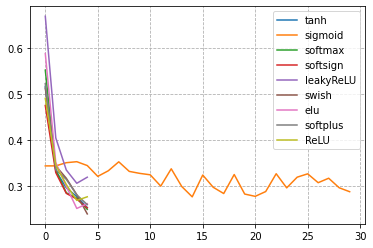

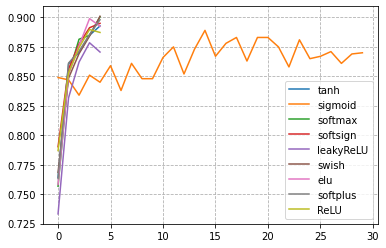

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# plot the loss
#optimizers = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD']
#label=['Adadelta']

#for i in optimizers:

plt.plot(read_r.history['loss'], label='tanh')
plt.plot(read_r1.history['loss'], label='sigmoid')
plt.plot(read_r2.history['loss'], label='softmax')
plt.plot(read_r3.history['loss'], label='softsign')
plt.plot(read_r4.history['loss'], label='leakyReLU')
plt.plot(read_r5.history['loss'], label='swish')
plt.plot(read_r6.history['loss'], label='elu')
plt.plot(read_r7.history['loss'], label='softplus')
plt.plot(read_r8.history['loss'], label='ReLU')
plt.grid(linestyle='--')
plt.legend()

plt.grid(linestyle='--')
plt.savefig('LossVal_lossaf1.pdf',dpi=800)
plt.show()
# plot the accuracy

plt.plot(read_r.history['acc'], label='tanh')
plt.plot(read_r1.history['acc'], label='sigmoid')
plt.plot(read_r2.history['acc'], label='softmax')
plt.plot(read_r3.history['acc'],  label='softsign')
plt.plot(read_r4.history['acc'], label='leakyReLU')
plt.plot(read_r5.history['acc'], label='swish')
plt.plot(read_r6.history['acc'], label='elu')
plt.plot(read_r7.history['acc'], label='softplus')
plt.plot(read_r8.history['acc'], label='ReLU')
plt.legend()

plt.grid(linestyle='--')

plt.show()
plt.savefig('AccVal_lossaf1.pdf',dpi=800)

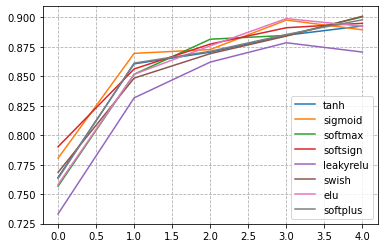

In [ ]:
plt.plot(read_r.history['acc'], label='tanh')
plt.plot(read_r1.history['acc'], label='sigmoid')
plt.plot(read_r2.history['acc'], label='softmax')
plt.plot(read_r3.history['acc'],  label='softsign')
plt.plot(read_r4.history['acc'], label='leakyrelu')
plt.plot(read_r5.history['acc'], label='swish')
plt.plot(read_r6.history['acc'], label='elu')
plt.plot(read_r7.history['acc'], label='softplus')
plt.legend()

plt.grid(linestyle='--')


plt.savefig('accVal_lossaff.pdf',dpi=800)
plt.show()

In [ ]:
Hard sigmoidal
Hard tanh
Rational tanh